In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge
from scipy import stats
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\gauri\Downloads\export (1).csv")
df



,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [3]:
def canonical(smiles):
    
    a,b = [],[]
    
    for i in smiles:
        a.append(Chem.MolFromSmiles(i))
        
    for j in a:
        b.append(Chem.MolToSmiles(j))
                 
    return b

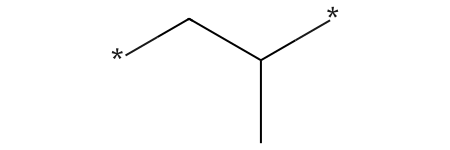

In [4]:
test = "[*]CC([*])C"
t = Chem.MolFromSmiles(test)
t

In [5]:
Chem.MolToSmiles(t)

'*CC(*)C'

In [6]:
!pip install mordred

In [7]:
from mordred import Calculator, descriptors
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [8]:
Morgan_fpts = morgan_fpts(df['smiles'])

In [9]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [11]:
mordred_descriptors = All_Mordred_descriptors(df['smiles'])

  7%|█████▉                                                                         | 469/6265 [00:20<09:28, 10.19it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  9%|██████▋                                                                        | 534/6265 [00:23<08:35, 11.11it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▎                                                                      | 662/6265 [00:33<15:42,  5.95it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▋                                                                      | 692/6265 [00:37<08:29, 10.93it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▊                                                                      | 701/6265 [00:39<13:26,  6.89it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▉                                                                      | 708/6265 [00:39<10:43,  8.64it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████| 6265/6265 [05:57<00:00, 17.51it/s]


In [12]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,42.046950,3.822450,18,2,16.0,14.0,3.361111,1.333333
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,46.021878,5.752735,18,2,16.0,14.0,3.361111,1.333333
2,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,64.012457,8.001557,28,3,24.0,22.0,4.312500,1.375000
3,4.876567,5.209852,0,0,6.602720,2.175328,4.350655,6.602720,0.943246,2.792781,...,8.466531,34.219913,82.003035,10.250379,42,6,30.0,30.0,5.173611,1.500000
4,7.063820,7.558525,0,0,9.907543,2.343259,4.686518,9.907543,0.990754,3.162641,...,9.223158,39.914584,128.024913,9.144637,115,13,46.0,50.0,6.625000,2.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,14.142228,13.273201,0,0,21.307960,2.474677,4.876137,21.307960,1.183776,3.827745,...,9.973433,67.244773,263.969055,11.998593,601,27,98.0,116.0,8.069444,3.673611
6261,7.818707,8.481783,0,0,11.420199,2.393403,4.786805,11.420199,1.038200,3.263704,...,9.447071,41.712231,143.983442,13.089404,144,17,52.0,59.0,7.486111,2.395833
6262,11.435146,11.493514,0,0,16.837003,2.449034,4.855714,16.837003,1.122467,3.618692,...,9.755625,61.091398,209.976249,12.351544,343,22,78.0,90.0,8.208333,3.083333
6263,12.142253,11.497525,0,0,18.104933,2.435203,4.870405,18.104933,1.131558,3.675879,...,9.817548,48.797213,204.019828,10.200991,420,25,82.0,94.0,8.458333,3.333333


In [13]:
y2 = df.iloc[392:823,:].value
x= mordred_descriptors.iloc[392:823,:50]
def scale_data(X):
    xmean = X.mean(axis=0)  # average of every column
    xstd = X.std(axis=0)
    data = (X - xmean) / xstd
    return data
x1=scale_data(x)
x2 = x1.dropna(axis=1)

In [14]:
x2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d
392,-1.320836,-1.529826,-0.091303,-0.068200,-1.323561,-1.582897,-1.612974,-1.323561,-0.975689,-2.086435,...,-0.767601,-0.768917,-0.778356,-0.769235,-1.305191,-1.300141,-1.291142,-1.308037,-1.320573,-1.273696
393,-1.259998,-1.422587,-0.091303,-0.068200,-1.273201,-1.373643,-1.394113,-1.273201,-1.306656,-1.843272,...,-0.767601,-0.768917,-0.778356,-0.769235,-1.237127,-1.228287,-1.208412,-1.226470,-1.226986,-1.211598
394,-1.180336,-1.291467,-0.091303,-0.068200,-1.237893,-0.972114,-0.974151,-1.237893,-2.052580,-1.615764,...,-0.767601,-0.768917,-0.778356,-0.769235,-1.146375,-1.156433,-1.090226,-1.144902,-1.086607,-1.149500
395,-1.007233,-1.084582,-0.091303,-0.068200,-1.020936,-1.341719,-1.360724,-1.020936,-0.806579,-1.134351,...,-0.726151,-0.735074,-0.753875,-0.762565,-0.964871,-0.949853,-0.901130,-0.895102,-0.889035,-0.864883
396,-1.077483,-1.149921,-0.091303,-0.068200,-1.064505,-1.168742,-1.179806,-1.064505,-0.378348,-1.283018,...,-0.736513,-0.749175,-0.772236,-0.769235,-1.032935,-1.012725,-0.977950,-0.976669,-0.972223,-0.947681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,-1.330248,-1.564678,-0.091303,-0.068200,-1.318988,-2.302766,-2.365891,-1.318988,-0.774090,-2.111162,...,-0.767601,-0.768917,-0.778356,-0.769235,-1.350567,-1.345049,-1.362053,-1.369213,-1.336171,-1.273696
819,1.190476,1.052653,-0.091303,-0.068200,1.046284,0.415234,0.476888,1.046284,0.146767,1.101761,...,0.557954,0.803558,0.563036,0.756012,1.213176,1.062052,1.155297,1.006441,1.055484,0.899738
820,1.677183,1.344656,-0.091303,-0.068200,1.533938,0.513703,0.579877,1.533938,0.380192,1.345381,...,0.814430,1.102510,0.865997,1.036159,1.712312,1.565028,1.687131,1.531532,1.606604,1.437922
821,1.198293,1.084405,-0.091303,14.628818,1.240748,0.364102,0.423408,1.240748,0.544960,1.127599,...,0.408559,0.424070,0.528354,0.624832,1.167800,1.142887,1.096204,1.133890,1.175066,1.220579


In [15]:
regressor2=MLPRegressor()
regressor2.fit(x2, y2) 


predictions2 = regressor2.predict(x2)

result2 = x2
result2['value'] = y2
result2['prediction'] = predictions2.tolist()
result2.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,value,prediction
392,-1.320836,-1.529826,-0.091303,-0.0682,-1.323561,-1.582897,-1.612974,-1.323561,-0.975689,-2.086435,...,-0.778356,-0.769235,-1.305191,-1.300141,-1.291142,-1.308037,-1.320573,-1.273696,34.04,53.631019
393,-1.259998,-1.422587,-0.091303,-0.0682,-1.273201,-1.373643,-1.394113,-1.273201,-1.306656,-1.843272,...,-0.778356,-0.769235,-1.237127,-1.228287,-1.208412,-1.226470,-1.226986,-1.211598,20.01,51.180452
394,-1.180336,-1.291467,-0.091303,-0.0682,-1.237893,-0.972114,-0.974151,-1.237893,-2.052580,-1.615764,...,-0.778356,-0.769235,-1.146375,-1.156433,-1.090226,-1.144902,-1.086607,-1.149500,21.64,46.813002
395,-1.007233,-1.084582,-0.091303,-0.0682,-1.020936,-1.341719,-1.360724,-1.020936,-0.806579,-1.134351,...,-0.753875,-0.762565,-0.964871,-0.949853,-0.901130,-0.895102,-0.889035,-0.864883,31.47,48.814305
396,-1.077483,-1.149921,-0.091303,-0.0682,-1.064505,-1.168742,-1.179806,-1.064505,-0.378348,-1.283018,...,-0.772236,-0.769235,-1.032935,-1.012725,-0.977950,-0.976669,-0.972223,-0.947681,75.06,49.254998


R^2 of Atomization energy: 0.2690990658893341
MSE of Atomization energy: 20.319234538706027


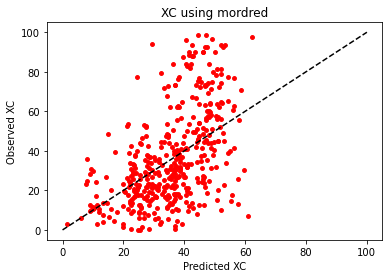

In [16]:
R2 =r2_score(y2,predictions2)
print('R^2 of Atomization energy:', R2)

Rmse = np.sqrt(mean_squared_error(y2, predictions2))
print('MSE of Atomization energy:', Rmse)

plt.scatter(predictions2,y2,c="r",s=15)
plt.plot([0,100], [0,100] ,"k--")
plt.savefig('EgC_mordred_RF.png')
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("XC using mordred");

In [17]:
from sklearn.model_selection import cross_val_score

reg_2 = MLPRegressor()
  
reg_2.fit(x2, y2) 

scores = cross_val_score(regressor2, x2, y2, cv = 5, scoring = 'neg_mean_squared_error' )


In [18]:
np.mean(scores)

-1.7459598953461892

In [19]:
reg= MLPRegressor()

param_grid = {
    'hidden_layer_sizes': [(150), (80,)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
}

In [20]:
grid = GridSearchCV(reg, param_grid, n_jobs= -1, cv=5)
grid.fit(x2,y2)

print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 150, 'max_iter': 100}


In [21]:
reg2 = MLPRegressor(hidden_layer_sizes= (150), max_iter= 100,alpha=0.0001)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.3)
  
reg2.fit(X_train1, y_train1) 


predictions2 = reg2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Atomization energy:', Rmse)

MSE of Atomization energy: 0.8463997392326544


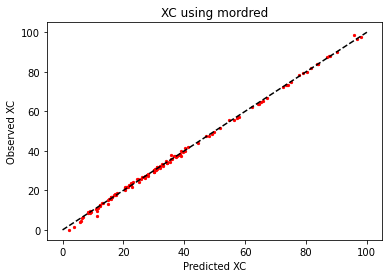

In [22]:
plt.scatter(predictions2,y_test1,c="r",s=5)
plt.plot([0,100], [0,100] ,"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("XC using mordred");